In [1]:
# Demo script to load and plot ECMWF forecast open data.

from datetime import datetime

# These are the five functions that you can use:
from show_forecasts.show_IFS_open_data import load_forecast, plot_forecast, plot_forecast_ensemble
from show_forecasts.show_IFS_open_data import print_forecast_info, get_possible_variables

In [2]:
# Where the forecasts are downloaded to
data_dir = '/home/c/cooperf/IFS/IFSens_2023/2024_openData_p25'

# The date that the forecast was initialised
forecast_init_date = datetime(year=2024, month=2, day=22)
# Pick today instead:
# forecast_init_date = datetime.now()

# See what variables are available
get_possible_variables();

Available variables to plot
sp    - Surface pressure (hPa)
msl   - Pressure at mean sea level (hPa)
t2m   - Two metre temperature (deg. C)
wind  - Wind speed (m/s)
tp    - Total precipitation (mm/day)
ro    - Surface runoff water (m)



In [3]:
# Load some forecast data
# Options given by possible_variables() are
#    'sp'   - Surface pressure (hPa)
#    'msl'  - Pressure at mean sea level (hPa)
#    't2m'  - Two metre temperature (deg. C)
#    'wind' - Wind speed (m/s)
#    'tp'   - Total precipitation (mm/h)
#    'ro'   - Surface runoff water (m)
data = load_forecast('tp', forecast_init_date, data_dir)

Loading tp with lead time 30h.
Loading tp with lead time 54h.


In [4]:
# Print some information about the forecast
print_forecast_info(forecast_init_date)

Forecast average: 2024-02-23 06:00:00 - 2024-02-24 06:00:00
Forecast initialisation: 2024-02-22 00:00:00



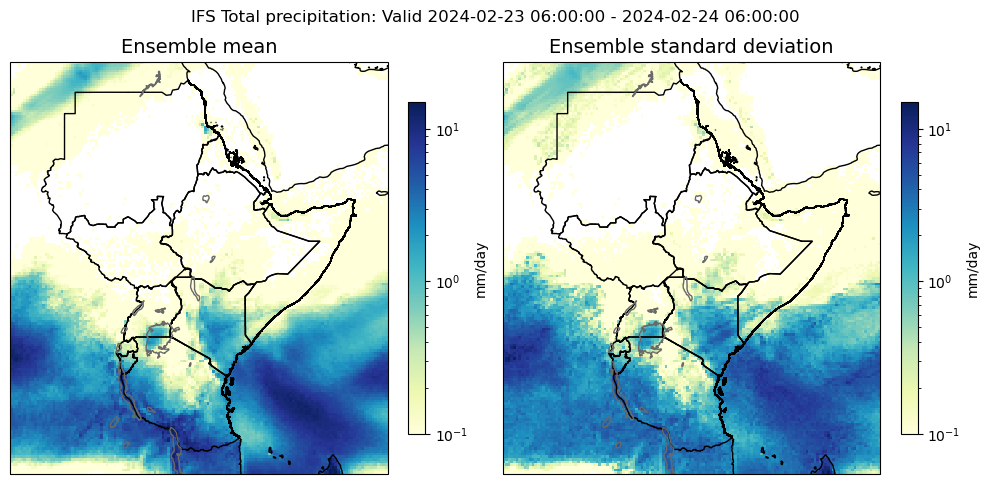

In [5]:
# Plot the current data
plot_forecast(data)

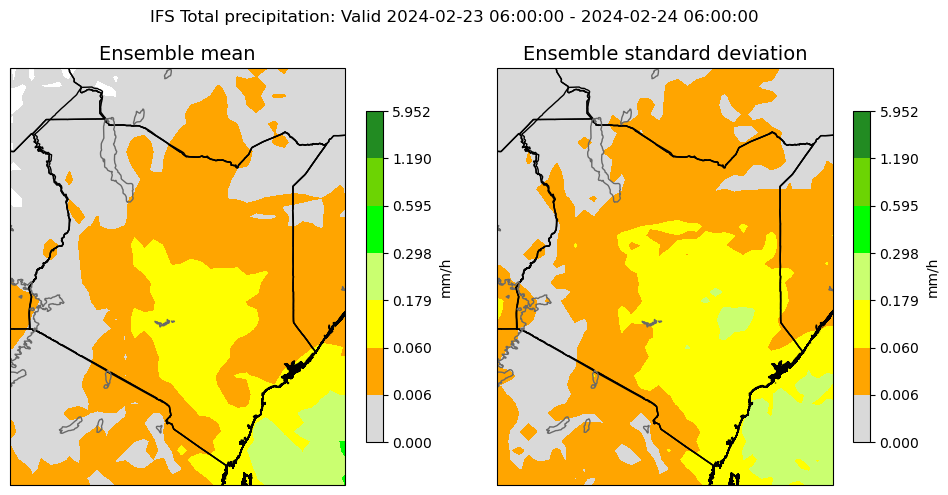

In [6]:
# style options: None (default), 'ICPAC', 'ICPAC_heavy', 'KMD', 'EMI', 'EMI_heavy'
# plot_units are only meaningfull for precipitation and can be 'mm/h' (default),
#               'mm/6h', 'mm/day' or 'mm/week'
# region can be 'ICPAC', 'Kenya', 'South Sudan', 'Rwanda', 'Burundi', 'Djibouti',
#               'Eritrea', 'Ethiopia', 'Sudan', 'Somalia', 'Tanzania', 'Uganda'
plot_forecast(data, style='ICPAC', plot_units='mm/h', region='Kenya')

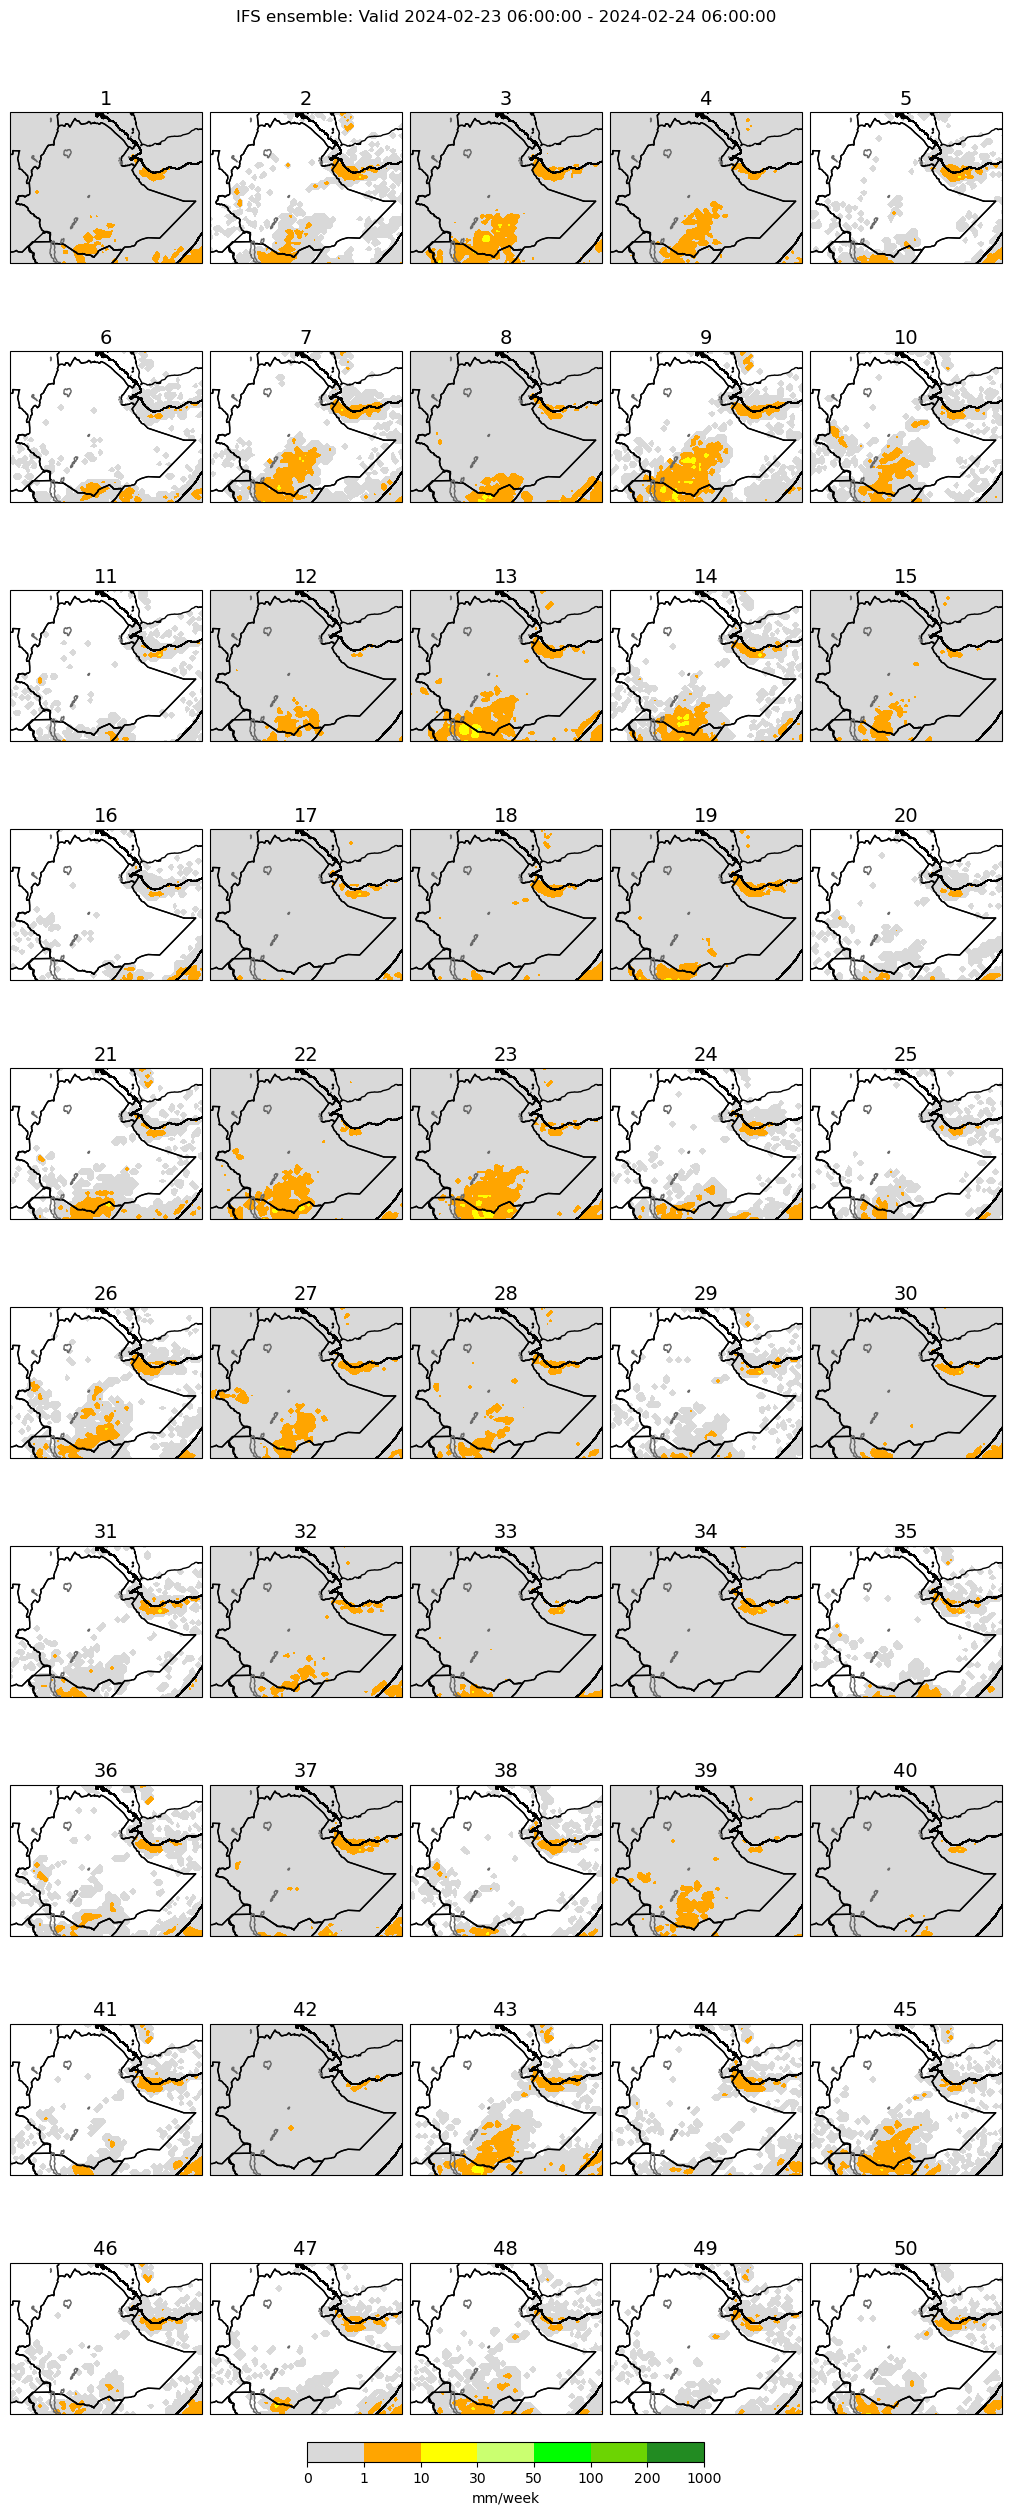

In [7]:
# Plot the ensemble
plot_forecast_ensemble(data, style='ICPAC', plot_units='mm/week', region='Ethiopia')

In [ ]:
# Show the other variables

data = load_forecast('msl', forecast_init_date, data_dir, status_updates=False)
plot_forecast(data)

data = load_forecast('t2m', forecast_init_date, data_dir, status_updates=False)
plot_forecast(data)

data = load_forecast('wind', forecast_init_date, data_dir, status_updates=False)
plot_forecast(data)

data = load_forecast('tp', forecast_init_date, data_dir, status_updates=False)
plot_forecast(data)

data = load_forecast('ro', forecast_init_date, data_dir, status_updates=False)
plot_forecast(data)

In [ ]:
#!jupyter nbconvert --to html test_load_IFS_openData.ipynb